In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn import preprocessing as pre
import keras
import tensorflow.keras.backend as K

In [241]:
# df = pd.read_csv('measurements/pattern_0_v1_20240514_14_23_22.csv', sep=', ')
df = pd.read_csv('measurements/pattern_2_v1_20240514_15_06_00.csv', sep=', ')
# df = pd.read_csv('measurements/E_4_20ms_20231103_14_55_46.csv', sep=', ')

C:\Users\crpdn\AppData\Local\Temp\ipykernel_20220\3146234132.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('measurements/pattern_2_v1_20240514_15_06_00.csv', sep=', ')


In [242]:
index = 2

In [243]:
df = df[df.Probeflag]
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

,Ch1(mA),Ch2(mA),Ch3(mA),Ch4(mA),Ch6(mA),Ch7(mA),Ch8(mA),Ch9(mA),Ch10(mA),Ch11(mA),...,Ch14(mA),Ch15(mA),Ch16(mA),Channel state,On time,Off time,Pulse number,Pattern,Time,Probeflag
5000,0.8504,1.261,1.149,1.119,1.427,1.017,1.437,1.432,1.413,0.7869,...,1.525,1.711,0.8065,1111111111111111,50,70,1,2/785,601.356876,True
5001,0.8504,1.261,1.153,1.119,1.427,1.017,1.437,1.432,1.413,0.7869,...,1.525,1.706,0.8065,1111111111111111,50,70,1,3/785,601.476268,True
5002,0.8504,1.261,1.153,1.119,1.422,1.017,1.437,1.432,1.413,0.7918,...,1.525,1.706,0.8065,1111111111111111,50,70,1,4/785,601.599054,True
5003,0.8504,1.266,1.153,1.119,1.422,1.017,1.437,1.432,1.413,0.7918,...,1.525,1.706,0.8065,1111111111111111,50,70,1,5/785,601.718814,True
5004,0.8504,1.266,1.149,1.119,1.422,1.017,1.437,1.432,1.413,0.7918,...,1.525,1.706,0.8065,1111111111111111,50,70,1,6/785,601.841801,True


In [244]:
size = df.shape[0]
size

784

Set model to use and simulate for given inputs

In [248]:
import functions
load = True

# model_path ='models/2024-04-17_12-35-13_single_step_41/model.h5'
# baseline_current = 0.93971

# model_path ='models/2024-05-14_18-50-13_single_step_v2/model.h5'
# baseline_current = 1.1841702461242676


# model_path ='models/2024-05-14_21-43-39_single_step_v3/model.h5'
# baseline_current = 1.787



# model_path ='models/2024-05-14_21-57-10_single_step_v4/model.h5'
# baseline_current = 1.5

model_path ='models/2024-05-14_22-04-09_single_step_v5/model.h5'
baseline_current = 0.8
functions.baseline_current = baseline_current

if load:
    model = keras.models.load_model(model_path)
functions.model = model


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [246]:

base_on_time= 50
on_time = 50
off_time= 20

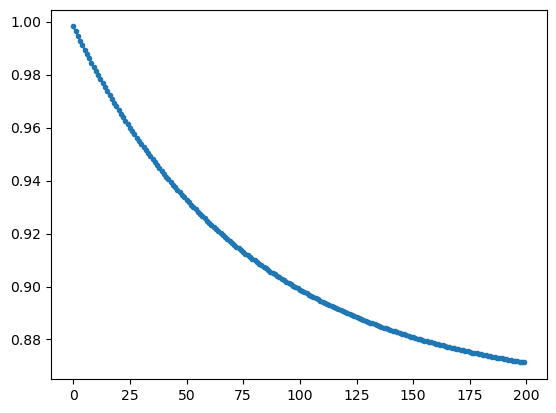

In [247]:
pulse_count_baseline = 200
base_calc_current, base_calc_on, base_calc_off = functions.pixel_to_signal_array(np.zeros((1,pulse_count_baseline)), base_on_time, on_time, off_time, modulation=1, max_int=1, linearize=False)
plt.plot(range(pulse_count_baseline),base_calc_current[0,:], marker='.', linestyle='-')  


In [177]:
baseline_current = base_calc_current[0,:].max()
functions.baseline_current = baseline_current
baseline_current


1.7843096256256104

In [249]:
simulated_current, _,_ = functions.pixel_to_signal_array(x_train[index], base_on_time, on_time, off_time, modulation=1, max_int=255, linearize=True)

Plot comparison

Text(0.5, 1.0, 'Device output per row signal')

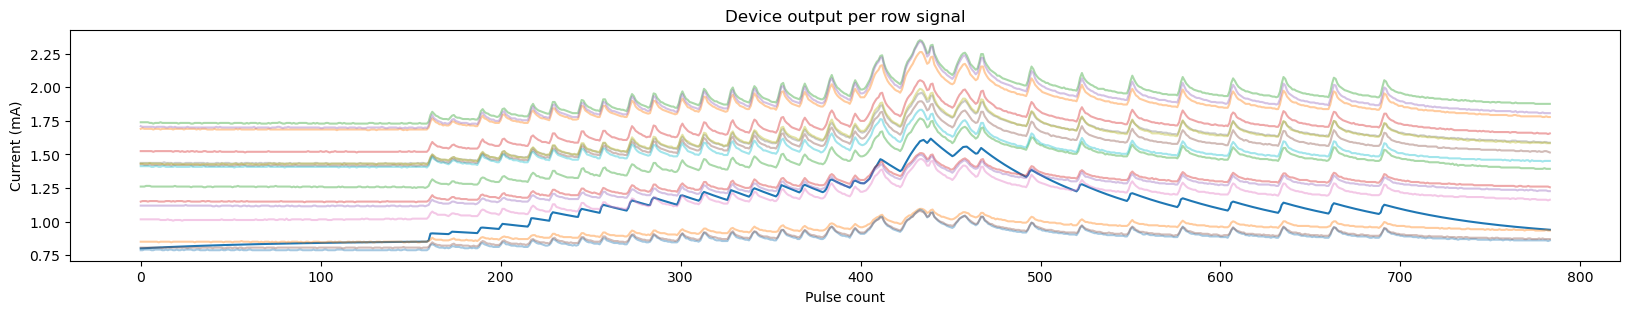

In [250]:
plt.figure(figsize=(20, 3))

plt.plot(range(size),simulated_current[0], linestyle='-',label = 'simulation')
for i in range(1,17):
   if f'Ch{i}(mA)'in df.columns:
      plt.plot(range(size),df[f'Ch{i}(mA)'], linestyle='-',label = f'Ch{i}',alpha=0.4)

#plt.legend()
plt.xlabel('Pulse count')
plt.ylabel('Current (mA)')
plt.title('Device output per row signal')

Text(0.5, 1.0, 'Device output per row signal')

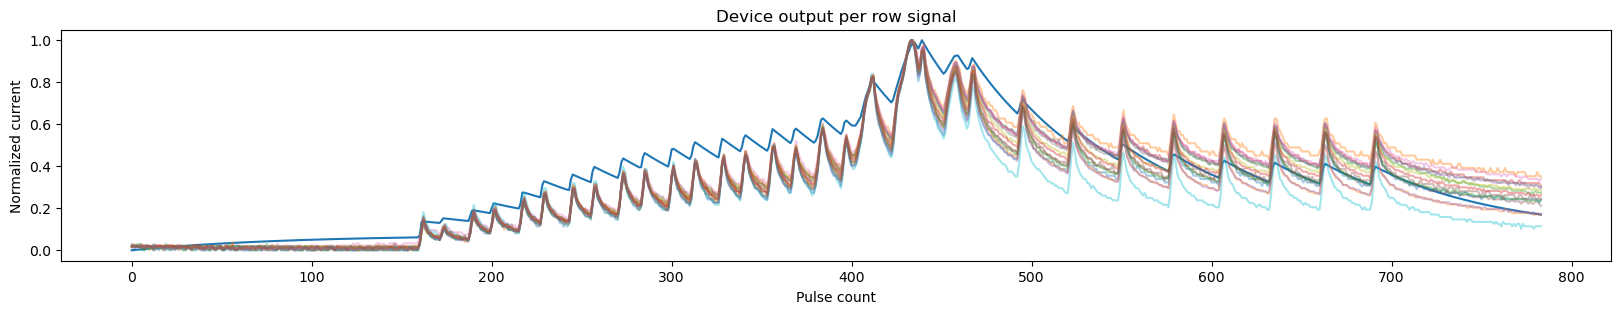

In [251]:
plt.figure(figsize=(20, 3))

plt.plot(range(size),pre.minmax_scale(simulated_current[0]), linestyle='-',label = 'simulation')
for i in range(1,17):
   if f'Ch{i}(mA)'in df.columns:
      plt.plot(range(size),pre.minmax_scale(df[f'Ch{i}(mA)']), linestyle='-',label = f'Ch{i}',alpha=0.4)

#plt.legend()
plt.xlabel('Pulse count')
plt.ylabel('Normalized current')
plt.title('Device output per row signal')